## Throughput

In [5]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
from ipywidgets import Layout, Button, Box
from nested_dict import nested_dict

import json
import os, glob
import pandas as pd
import pandas.io.json as pdjson
import seaborn as sns
import ipywidgets as widgets

sns.set(style="whitegrid")

In [6]:
# Initialization
artifacts_dir = "notebooks/interactive/test/artifacts/turing.ocamllabs.io/ocaml_5.00__5.00"
selected_files = []
selected_baseline = ""
enable_gui = True

In [7]:
# Parameters cell
if enable_gui == False:
    print(enable_gui)
    print(artifacts_dir)
    print(selected_benches)
    print(selected_baseline)

In [8]:
if enable_gui:
    from IPython.core.display import display, HTML
    display(HTML("<style>.container { width:100% !important; }</style>"))

In [9]:
bench_files = []

artifacts_path = artifacts_dir.split("/artifacts/")[0]

for root, dirs, files in os.walk(artifacts_dir):
    for file in files:
        if file.endswith(".orun.summary.bench"):
            # print(root)
            f = root.split("/artifacts/")[1]
            # print(f)
            if (len (f.split("/")) <= 5):
                bench_files.append((os.path.join(root, file)))

In [10]:
len(bench_files)

0

In [11]:
nd = nested_dict(2, list)
for x in bench_files:
    l = x.split("/artifacts/")[1]
    d = l.split("/")
    host      = d[0]
    repo      = d[1]
    commit    = d[2]
    variant   = d[3]
    timestamp = d[4]
    ocaml     = d[5]
    value      = commit + " " + variant + " " + timestamp + " " + ocaml
    nd[host][repo].append(value)
benches = nd.to_dict()    

In [12]:
benches

{}

In [13]:
def f(x):
    return x

def disp(benches):
    def select_repo(host):
        repoW.options = benches[host]
    
    def select_commit(repo):
        commitW.options = repo

    def select_variant(commit):
        return None

    hostW = widgets.Dropdown(options=benches.keys(), description='Host', disabled=False)
    hostS = hostW.value
    hostD = widgets.interactive(select_repo, host=hostW)

    repoW = widgets.Dropdown(options=benches[hostS].keys(), description='Repository', disabled=False)
    repoS = repoW.value
    repoD = widgets.interactive(select_commit, repo=repoW)

    commitW = widgets.Dropdown(options=benches[hostS][repoS], description='Commit', disabled=False)
    commitS = commitW.value
    commitD = widgets.interactive(select_variant, commit=commitW)

    items_layout = Layout( width='auto' )
    
    box_layout = Layout(display='flex',
                       flex_flow='row wrap',
                       align_items='flex-start',
                       #border='solid',
                       width='100%')
    
    items = [hostD, repoD, commitD]
    box = Box(children=items, layout=box_layout)    
    
    # display(hostD, repoD, commitD)
    display(box)
    return (hostD, repoD, commitD)

def get_filename(h, r, c):
    host = h.children[0].value
    # print(host)
    
    repos = list(benches[host].keys())
    repo= repos[r.children[0].index]
    # print(repo)
    
    entries = list(benches[host][repo])
    commit_last = entries[c.children[0].index]

    commit_list = commit_last.split(" ")
    filename = os.path.join(artifacts_path, 'artifacts', host, repo, '/'.join(commit_list))
    print(filename)
    return(filename)

In [14]:
comparisons = interactive(f, x=widgets.IntText(value=2, 
                                               description='Comparisons', 
                                               disabled=False))
display(comparisons)

interactive(children=(IntText(value=2, description='Comparisons'), Output()), _dom_classes=('widget-interact',…

In [15]:
print(comparisons.result)

2


In [16]:
matrix = [[0 for x in range(4)] for y in range(comparisons.result)]
    
for i in range(comparisons.result):
    matrix[i][0], matrix[i][1], matrix[i][2] = disp(benches)

KeyError: None

In [ ]:
for i in range(comparisons.result):
    matrix[i][3] = get_filename(matrix[i][0], matrix[i][1], matrix[i][2])

/Users/sk/sandmark/notebooks/interactive/test/artifacts/turing.ocamllabs.io/ocaml_5.00__5.00/b73cbbea4bc40ffd26a459d594a39b99cec4273d/vanilla/20220228_010330/5.00+stable+sequential_1.orun.summary.bench
/Users/sk/sandmark/notebooks/interactive/test/artifacts/turing.ocamllabs.io/ocaml_5.00__5.00/f3ea33a4c9b0d2872b0bcccbcce5428b2e468373/vanilla/20220223_010015/5.00+trunk+sequential_1.orun.summary.bench


In [ ]:
for i in range (comparisons.result):
    print(matrix[i][3])
    selected_files.append(matrix[i][3])

/Users/sk/sandmark/notebooks/interactive/test/artifacts/turing.ocamllabs.io/ocaml_5.00__5.00/b73cbbea4bc40ffd26a459d594a39b99cec4273d/vanilla/20220228_010330/5.00+stable+sequential_1.orun.summary.bench
/Users/sk/sandmark/notebooks/interactive/test/artifacts/turing.ocamllabs.io/ocaml_5.00__5.00/f3ea33a4c9b0d2872b0bcccbcce5428b2e468373/vanilla/20220223_010015/5.00+trunk+sequential_1.orun.summary.bench


In [ ]:
if enable_gui == False:
    for i in selected_benches:
        commit_list = i[2].split(" ")
        selected_files.append(os.path.join(artifacts_dir, i[0], i[1], '/'.join(commit_list)))

In [ ]:
data_frames = []

for file in selected_files:
    with open(file) as f:
        data = []
        for l in f:
            temp = json.loads(l)
            if 'name' in temp:
                data.append(json.loads(l))
        df = pd.json_normalize(data)
        df['variant'] = os.path.basename(file).replace(".orun.bench","")
        data_frames.append(df)

df = pd.concat (data_frames, sort=False)
df = df.sort_values(['name']) 
# Uncomment the following to display all the lines in pandas output
pd.set_option('display.max_rows', df.shape[0]+1)
df

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.minor_words,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.forced_major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant
9,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.011007,3.974770,0.035988,30224,142329.0,https://github.com/ocaml/ocaml/archive/b73cbbe...,5.00.0+dev0-2021-11-05,gcc,...,2155870555,242,4194616,8229,6,0,3198985,4247564,3302.926734,5.00+stable+sequential_1.orun.summary.bench
9,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.011004,3.986735,0.023992,30084,142067.0,https://github.com/ocaml/ocaml/archive/trunk.t...,5.00.0+dev0-2021-11-05,gcc,...,2155870555,242,4194616,8229,6,0,3198985,4247564,3302.926734,5.00+trunk+sequential_1.orun.summary.bench
20,alt-ergo.fill.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,2.273756,2.091136,0.182357,441648,2785481.0,https://github.com/ocaml/ocaml/archive/b73cbbe...,5.00.0+dev0-2021-11-05,gcc,...,179629427,56199547,60794131,700,15,0,54394248,54394248,5.755168,5.00+stable+sequential_1.orun.summary.bench
20,alt-ergo.fill.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,2.265305,2.036977,0.228071,442424,2785495.0,https://github.com/ocaml/ocaml/archive/trunk.t...,5.00.0+dev0-2021-11-05,gcc,...,179629429,56216116,60810700,700,15,0,54484360,54484360,5.698493,5.00+trunk+sequential_1.orun.summary.bench
11,alt-ergo.yyll.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,17.761735,17.517296,0.244018,341680,2785481.0,https://github.com/ocaml/ocaml/archive/b73cbbe...,5.00.0+dev0-2021-11-05,gcc,...,2053015097,66209057,83473786,7852,21,0,41454596,41454596,30.378254,5.00+stable+sequential_1.orun.summary.bench
11,alt-ergo.yyll.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,18.050848,17.838380,0.212028,341180,2785495.0,https://github.com/ocaml/ocaml/archive/trunk.t...,5.00.0+dev0-2021-11-05,gcc,...,2053015020,66013589,83278286,7853,21,0,41483268,41483268,30.329643,5.00+trunk+sequential_1.orun.summary.bench
31,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,5.401702,5.389461,0.012003,22616,194141.0,https://github.com/ocaml/ocaml/archive/trunk.t...,5.00.0+dev0-2021-11-05,gcc,...,1227749947,1952179,2484347,4695,10,0,2027158,2092697,23.657402,5.00+trunk+sequential_1.orun.summary.bench
31,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,5.117265,5.100994,0.016003,22640,194147.0,https://github.com/ocaml/ocaml/archive/b73cbbe...,5.00.0+dev0-2021-11-05,gcc,...,1227749947,1952179,2484347,4695,10,0,2027158,2092697,23.657402,5.00+stable+sequential_1.orun.summary.bench
36,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,10.687065,10.598822,0.087990,217244,324040.0,https://github.com/ocaml/ocaml/archive/trunk.t...,5.00.0+dev0-2021-11-05,gcc,...,916456774,280496186,280496252,3542,46,0,23392256,27054080,50.289195,5.00+trunk+sequential_1.orun.summary.bench
36,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,10.628480,10.496177,0.132002,217208,324302.0,https://github.com/ocaml/ocaml/archive/b73cbbe...,5.00.0+dev0-2021-11-05,gcc,...,916456774,280496186,280496252,3542,46,0,23392256,27054080,50.289195,5.00+stable+sequential_1.orun.summary.bench


### Drop some benchmarks


In [ ]:
df = df[(df.name != 'alt-ergo.fill.why') &         #multicore version does not exist
        (df.name != 'alt-ergo.yyll.why') &         #multicore version does not exist
        (df.name != 'frama-c.slevel') &            #multicore version does not exist
        (df.name != 'js_of_ocaml.frama-c_byte')]   #multicore version does not exist
throughput_df = df
df

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.minor_words,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.forced_major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant
9,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.011007,3.974770,0.035988,30224,142329.0,https://github.com/ocaml/ocaml/archive/b73cbbe...,5.00.0+dev0-2021-11-05,gcc,...,2155870555,242,4194616,8229,6,0,3198985,4247564,3302.926734,5.00+stable+sequential_1.orun.summary.bench
9,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.011004,3.986735,0.023992,30084,142067.0,https://github.com/ocaml/ocaml/archive/trunk.t...,5.00.0+dev0-2021-11-05,gcc,...,2155870555,242,4194616,8229,6,0,3198985,4247564,3302.926734,5.00+trunk+sequential_1.orun.summary.bench
31,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,5.401702,5.389461,0.012003,22616,194141.0,https://github.com/ocaml/ocaml/archive/trunk.t...,5.00.0+dev0-2021-11-05,gcc,...,1227749947,1952179,2484347,4695,10,0,2027158,2092697,23.657402,5.00+trunk+sequential_1.orun.summary.bench
31,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,5.117265,5.100994,0.016003,22640,194147.0,https://github.com/ocaml/ocaml/archive/b73cbbe...,5.00.0+dev0-2021-11-05,gcc,...,1227749947,1952179,2484347,4695,10,0,2027158,2092697,23.657402,5.00+stable+sequential_1.orun.summary.bench
36,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,10.687065,10.598822,0.087990,217244,324040.0,https://github.com/ocaml/ocaml/archive/trunk.t...,5.00.0+dev0-2021-11-05,gcc,...,916456774,280496186,280496252,3542,46,0,23392256,27054080,50.289195,5.00+trunk+sequential_1.orun.summary.bench
36,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,10.628480,10.496177,0.132002,217208,324302.0,https://github.com/ocaml/ocaml/archive/b73cbbe...,5.00.0+dev0-2021-11-05,gcc,...,916456774,280496186,280496252,3542,46,0,23392256,27054080,50.289195,5.00+stable+sequential_1.orun.summary.bench
30,chameneos_redux_lwt.600000,taskset --cpu-list 5 ./chameneos_redux_lwt.exe...,4.402072,2.158948,2.242907,7108,449817.0,https://github.com/ocaml/ocaml/archive/trunk.t...,5.00.0+dev0-2021-11-05,gcc,...,547213497,747877,747943,2139,52,0,118784,118784,312.908745,5.00+trunk+sequential_1.orun.summary.bench
30,chameneos_redux_lwt.600000,taskset --cpu-list 5 ./chameneos_redux_lwt.exe...,4.410365,2.177037,2.233064,7136,450079.0,https://github.com/ocaml/ocaml/archive/b73cbbe...,5.00.0+dev0-2021-11-05,gcc,...,547213497,747877,747943,2139,52,0,118784,118784,312.908745,5.00+stable+sequential_1.orun.summary.bench
7,crout-decomposition.,taskset --cpu-list 5 ./crout_decomposition.exe,1.376621,1.364397,0.012003,66732,384974.0,https://github.com/ocaml/ocaml/archive/b73cbbe...,5.00.0+dev0-2021-11-05,gcc,...,542209130,298236,7775780,2076,7,0,7776496,7776496,2809.271544,5.00+stable+sequential_1.orun.summary.bench
7,crout-decomposition.,taskset --cpu-list 5 ./crout_decomposition.exe,1.374682,1.338536,0.035960,66548,384712.0,https://github.com/ocaml/ocaml/archive/trunk.t...,5.00.0+dev0-2021-11-05,gcc,...,542209130,298236,7775780,2076,7,0,7776496,7776496,2809.271544,5.00+trunk+sequential_1.orun.summary.bench


### Selection example

```
select * from df where variant = '4.10.0+trunk' and time_secs > 10
```

In [ ]:
baseline_h, baseline_r, baseline_c = disp(benches)

Box(children=(interactive(children=(Dropdown(description='Host', options=('turing.ocamllabs.io',), value='turi…

In [ ]:
selected_baseline = baseline_c.children[0].value.split(" ")[3].split(".orun.bench")[0]

print(selected_baseline)

5.00+stable+sequential_1.orun.summary.bench


In [ ]:
df.loc[(df['variant'] == selected_baseline) & (df['time_secs'] > 10)]

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.minor_words,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.forced_major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant
36,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,10.628480,10.496177,0.132002,217208,324302.0,https://github.com/ocaml/ocaml/archive/b73cbbe...,5.00.0+dev0-2021-11-05,gcc,...,916456774,280496186,280496252,3542,46,0,23392256,27054080,50.289195,5.00+stable+sequential_1.orun.summary.bench
37,cubicle.german_pfs.cub,taskset --cpu-list 5 cubicle benchmarks/cubicl...,242.375434,241.012972,1.359998,618852,1243748.0,https://github.com/ocaml/ocaml/archive/b73cbbe...,5.00.0+dev0-2021-11-05,gcc,...,20124451255,560310654,3513953067,76956,264,0,49265089,85305068,122.402634,5.00+stable+sequential_1.orun.summary.bench
23,cubicle.szymanski_at.cub,taskset --cpu-list 5 cubicle benchmarks/cubicl...,484.240873,483.909845,0.327997,244268,1243748.0,https://github.com/ocaml/ocaml/archive/b73cbbe...,5.00.0+dev0-2021-11-05,gcc,...,106078806124,6235861060,6427464163,405548,891,0,23085708,39699915,91.282419,5.00+stable+sequential_1.orun.summary.bench
14,evolutionary_algorithm.10000_10000,taskset --cpu-list 5 ./evolutionary_algorithm....,54.104407,51.599901,2.503995,3821076,238295.0,https://github.com/ocaml/ocaml/archive/b73cbbe...,5.00.0+dev0-2021-11-05,gcc,...,3728670123,715444,1300975523,14250,24,0,457775736,488313558,15.251228,5.00+stable+sequential_1.orun.summary.bench
28,fannkuchredux.12,taskset --cpu-list 5 ./fannkuchredux.exe 12,107.998554,107.998182,0.000000,5916,324528.0,https://github.com/ocaml/ocaml/archive/b73cbbe...,5.00.0+dev0-2021-11-05,gcc,...,826,33,99,1,1,0,16384,16384,0.000000,5.00+stable+sequential_1.orun.summary.bench
27,fannkuchredux2.12,taskset --cpu-list 5 ./fannkuchredux2.exe 12,95.854140,95.853786,0.000000,5804,324661.0,https://github.com/ocaml/ocaml/archive/b73cbbe...,5.00.0+dev0-2021-11-05,gcc,...,827,33,99,1,1,0,16384,16384,0.000000,5.00+stable+sequential_1.orun.summary.bench
10,game_of_life.256,taskset --cpu-list 5 ./game_of_life.exe 256,10.000866,9.988620,0.012000,19872,144370.0,https://github.com/ocaml/ocaml/archive/b73cbbe...,5.00.0+dev0-2021-11-05,gcc,...,335,228,2101544,4,4,0,1627651,1627651,5491.414292,5.00+stable+sequential_1.orun.summary.bench
13,grammatrix.,taskset --cpu-list 5 ./grammatrix.exe,96.454107,95.853246,0.599982,509540,290722.0,https://github.com/ocaml/ocaml/archive/b73cbbe...,5.00.0+dev0-2021-11-05,gcc,...,146522389,1901543,68621706,571,13,0,63329410,64423042,5.757057,5.00+stable+sequential_1.orun.summary.bench
45,knucleotide.,taskset --cpu-list 5 ./knucleotide.exe,48.846672,48.562300,0.284013,335380,325624.0,https://github.com/ocaml/ocaml/archive/b73cbbe...,5.00.0+dev0-2021-11-05,gcc,...,88097268,2355058,51009803,347,12,0,42883895,42883895,17.357103,5.00+stable+sequential_1.orun.summary.bench
29,knucleotide3.,taskset --cpu-list 5 ./knucleotide3.exe,48.989313,48.768961,0.219986,267488,329130.0,https://github.com/ocaml/ocaml/archive/b73cbbe...,5.00.0+dev0-2021-11-05,gcc,...,68361702,1542072,33941432,268,7,0,34001097,34001097,4815.933118,5.00+stable+sequential_1.orun.summary.bench


In [ ]:
df.loc[df['name'] == 'LU_decomposition.1024']

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.minor_words,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.forced_major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant
9,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.011007,3.974770,0.035988,30224,142329.0,https://github.com/ocaml/ocaml/archive/b73cbbe...,5.00.0+dev0-2021-11-05,gcc,...,2155870555,242,4194616,8229,6,0,3198985,4247564,3302.926734,5.00+stable+sequential_1.orun.summary.bench
9,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.011004,3.986735,0.023992,30084,142067.0,https://github.com/ocaml/ocaml/archive/trunk.t...,5.00.0+dev0-2021-11-05,gcc,...,2155870555,242,4194616,8229,6,0,3198985,4247564,3302.926734,5.00+trunk+sequential_1.orun.summary.bench


### Projection example

```
select name, variant, time_secs from df
```

In [ ]:
df.filter(['name','variant','time_secs'])

,name,variant,time_secs
9,LU_decomposition.1024,5.00+stable+sequential_1.orun.summary.bench,4.011007
9,LU_decomposition.1024,5.00+trunk+sequential_1.orun.summary.bench,4.011004
31,bdd.26,5.00+trunk+sequential_1.orun.summary.bench,5.401702
31,bdd.26,5.00+stable+sequential_1.orun.summary.bench,5.117265
36,binarytrees5.21,5.00+trunk+sequential_1.orun.summary.bench,10.687065
36,binarytrees5.21,5.00+stable+sequential_1.orun.summary.bench,10.628480
30,chameneos_redux_lwt.600000,5.00+trunk+sequential_1.orun.summary.bench,4.402072
30,chameneos_redux_lwt.600000,5.00+stable+sequential_1.orun.summary.bench,4.410365
7,crout-decomposition.,5.00+stable+sequential_1.orun.summary.bench,1.376621
7,crout-decomposition.,5.00+trunk+sequential_1.orun.summary.bench,1.374682


## Time

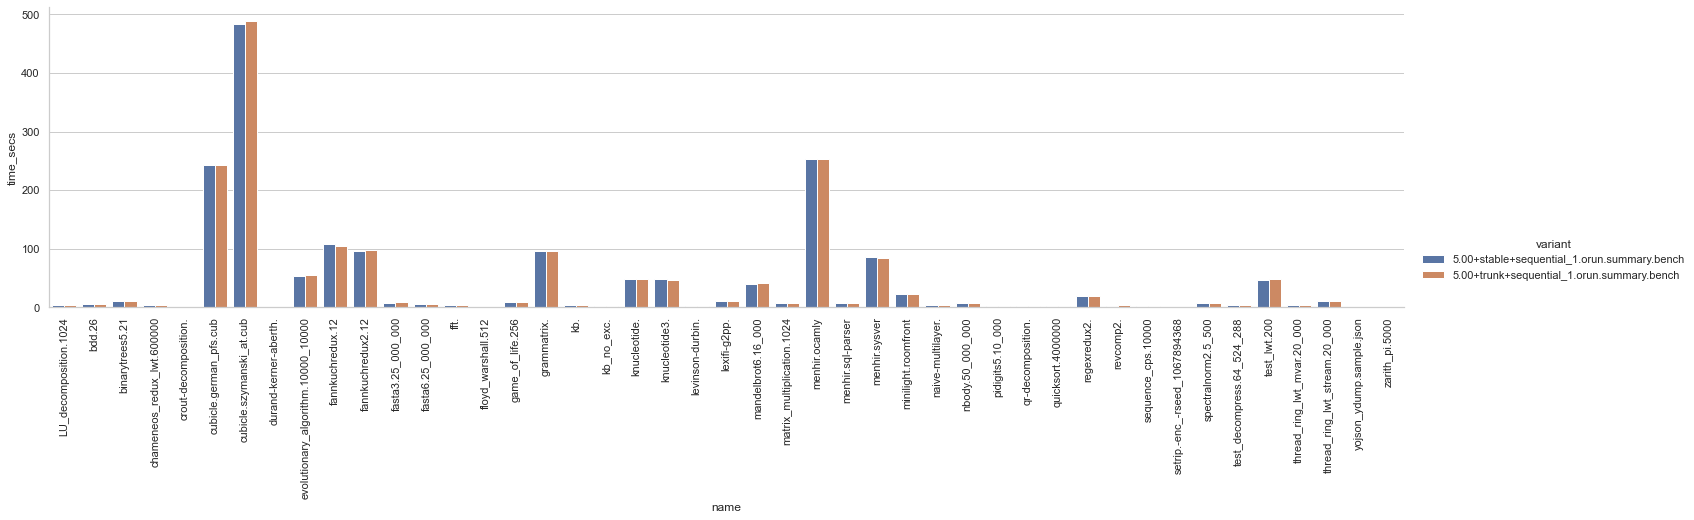

In [ ]:
g = sns.catplot (x='name', y='time_secs', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

In [ ]:
def create_column(df, variant, metric):
    df = pd.DataFrame.copy(df)
    variant_metric_name = list([ zip(df[metric], df[x], df['name']) 
              for x in df.columns.array if x == "variant" ][0])
    name_metric = {n:t for (t, v, n) in variant_metric_name if v == variant}
    return name_metric

def add_display_name(df,variant, metric):
    name_metric = create_column(pd.DataFrame.copy(df), variant, metric)
    disp_name = [name+" ("+str(round(name_metric[name], 2))+")" for name in df["name"]]
    df["display_name"] = pd.Series(disp_name, index=df.index)
    return df

def normalise(df,variant,topic,additionalTopics=[]):
    df = add_display_name(df,variant,topic)
    df = df.sort_values(["name","variant"])
    grouped = df.filter(items=['name',topic,'variant','display_name']+additionalTopics).groupby('variant')
    ndata_frames = []
    for group in grouped:
        (v,data) = group
        if(v != variant):
            data['b'+topic] = grouped.get_group(variant)[topic].values
            data[['n'+topic]] = data[[topic]].div(grouped.get_group(variant)[topic].values, axis=0)
            for t in additionalTopics:
                print(variant, t)
                data[[t]] = grouped.get_group(variant)[t].values
            ndata_frames.append(data)
    df = pd.concat (ndata_frames)
    return df

def plot_normalised(df,variant,topic):
    df = pd.DataFrame.copy(df)
    df.sort_values(by=[topic],inplace=True)
    df[topic] = df[topic] - 1
    g = sns.catplot (x="display_name", y=topic, hue='variant', data = df, kind ='bar', aspect=4, bottom=1)
    g.set_xticklabels(rotation=90)
    g.ax.legend(loc=8)
    g._legend.remove()
    g.ax.set_xlabel("Benchmarks")
    return g
    # g.ax.set_yscale('log')

/var/folders/kt/n9q5lcv93sg3lm2wsrn1kkrw0000gp/T/ipykernel_94763/2291190651.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["display_name"] = pd.Series(disp_name, index=df.index)


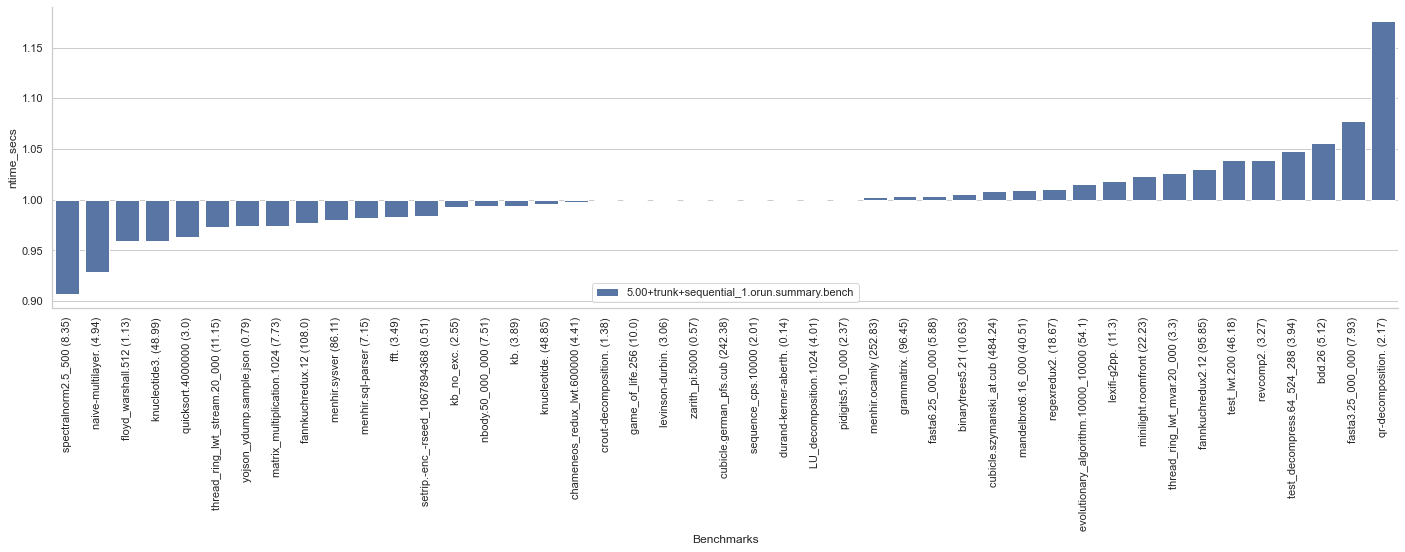

In [ ]:
ndf = normalise(df, selected_baseline, 'time_secs')
plot_normalised(ndf, selected_baseline,'ntime_secs')

## Top heap words

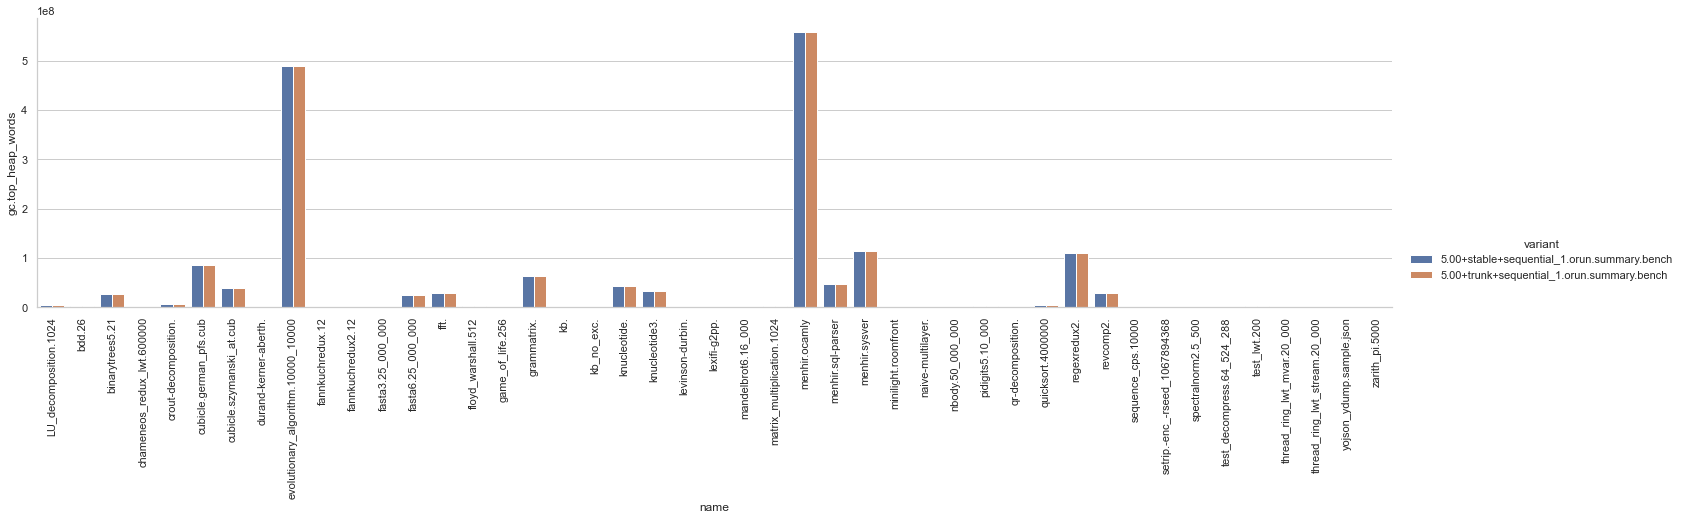

In [ ]:
g = sns.catplot (x='name', y='gc.top_heap_words', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

/var/folders/kt/n9q5lcv93sg3lm2wsrn1kkrw0000gp/T/ipykernel_94763/2291190651.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["display_name"] = pd.Series(disp_name, index=df.index)


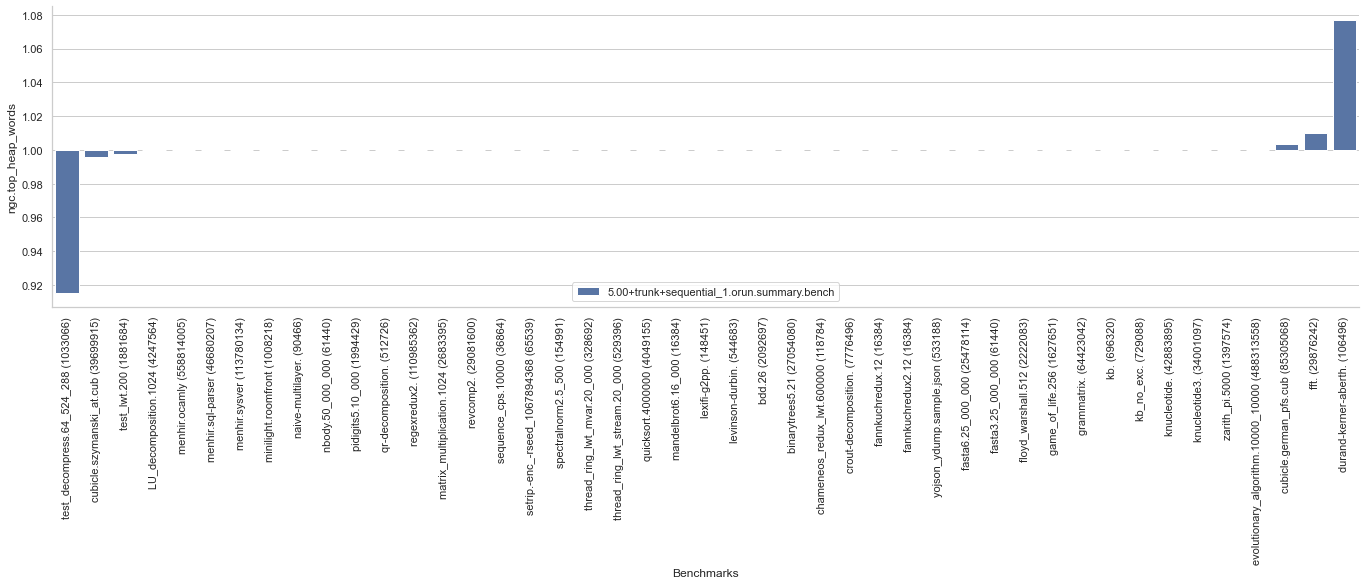

In [ ]:
ndf = normalise(df, selected_baseline, 'gc.top_heap_words')
plot_normalised(ndf, selected_baseline,'ngc.top_heap_words')

## Max RSS (KB)

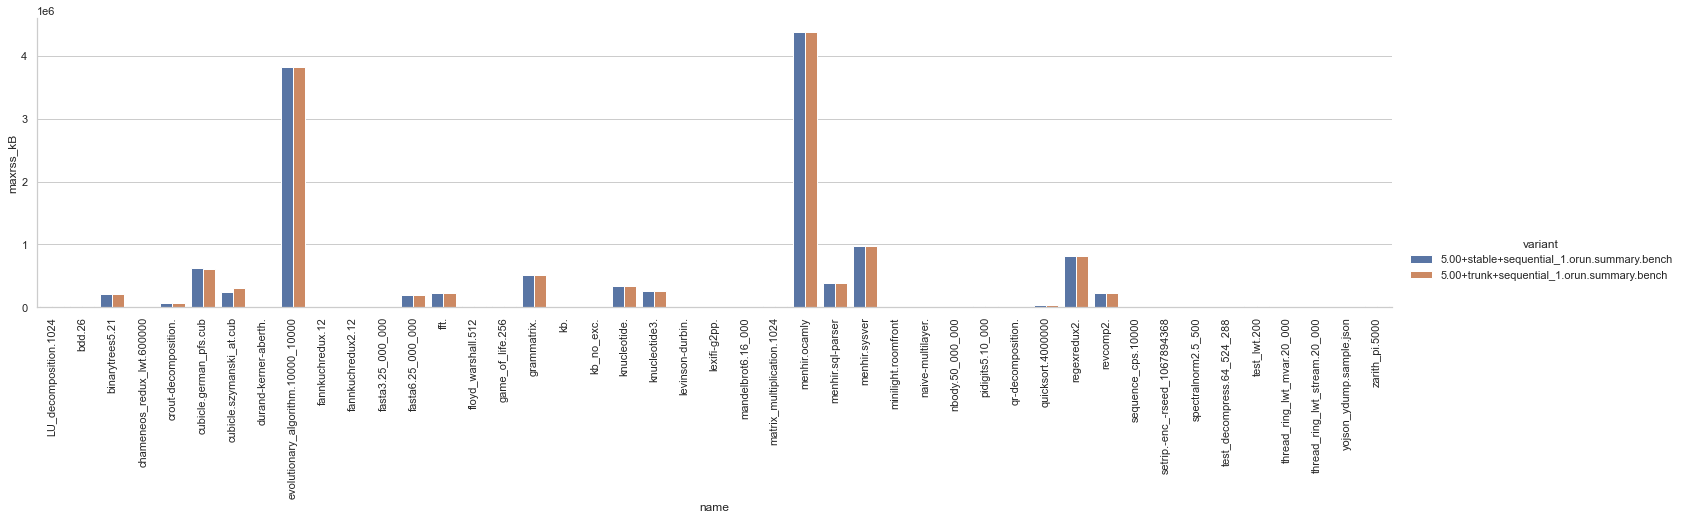

In [ ]:
g = sns.catplot (x='name', y='maxrss_kB', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

/var/folders/kt/n9q5lcv93sg3lm2wsrn1kkrw0000gp/T/ipykernel_94763/2291190651.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["display_name"] = pd.Series(disp_name, index=df.index)


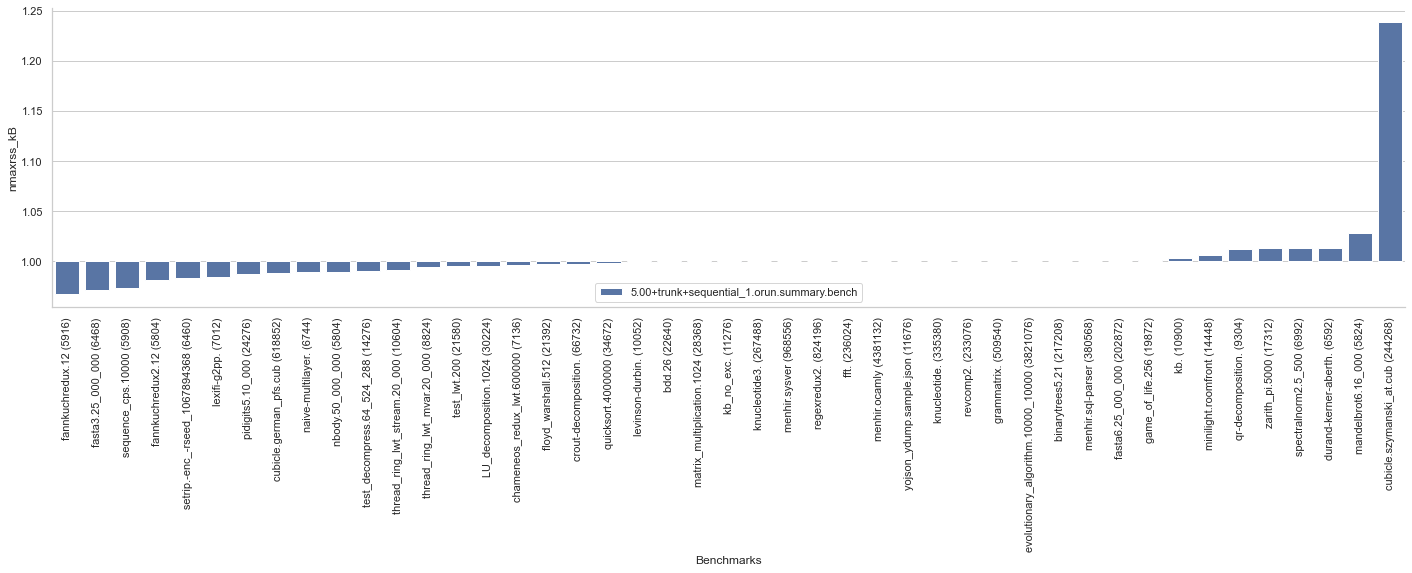

In [ ]:
ndf = normalise(df, selected_baseline,'maxrss_kB')
plot_normalised(ndf, selected_baseline,'nmaxrss_kB')

## Major Collections

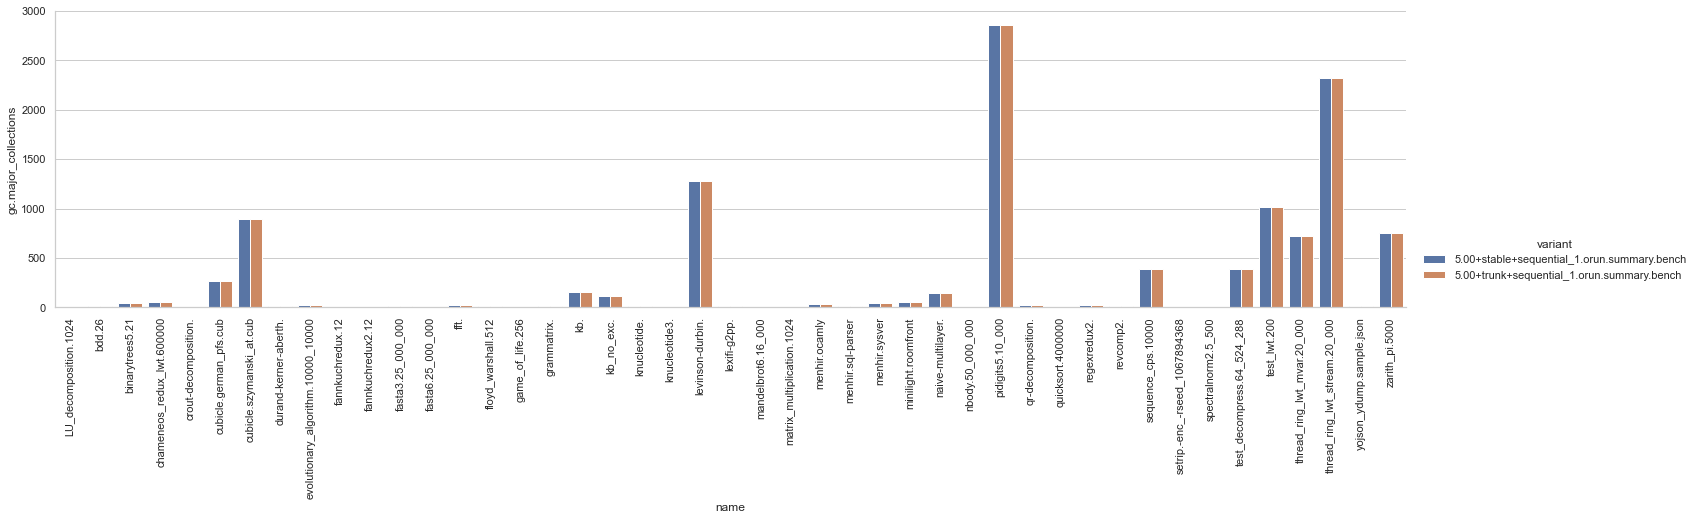

In [ ]:
g = sns.catplot (x='name', y='gc.major_collections', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

/var/folders/kt/n9q5lcv93sg3lm2wsrn1kkrw0000gp/T/ipykernel_94763/2291190651.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["display_name"] = pd.Series(disp_name, index=df.index)


,name,gc.major_collections,variant,display_name,bgc.major_collections,ngc.major_collections
9,LU_decomposition.1024,6,5.00+trunk+sequential_1.orun.summary.bench,LU_decomposition.1024 (6),6,1.000000
31,bdd.26,10,5.00+trunk+sequential_1.orun.summary.bench,bdd.26 (10),10,1.000000
36,binarytrees5.21,46,5.00+trunk+sequential_1.orun.summary.bench,binarytrees5.21 (46),46,1.000000
30,chameneos_redux_lwt.600000,52,5.00+trunk+sequential_1.orun.summary.bench,chameneos_redux_lwt.600000 (52),52,1.000000
7,crout-decomposition.,7,5.00+trunk+sequential_1.orun.summary.bench,crout-decomposition. (7),7,1.000000
37,cubicle.german_pfs.cub,264,5.00+trunk+sequential_1.orun.summary.bench,cubicle.german_pfs.cub (264),264,1.000000
23,cubicle.szymanski_at.cub,892,5.00+trunk+sequential_1.orun.summary.bench,cubicle.szymanski_at.cub (891),891,1.001122
25,durand-kerner-aberth.,12,5.00+trunk+sequential_1.orun.summary.bench,durand-kerner-aberth. (12),12,1.000000
14,evolutionary_algorithm.10000_10000,24,5.00+trunk+sequential_1.orun.summary.bench,evolutionary_algorithm.10000_10000 (24),24,1.000000
28,fannkuchredux.12,1,5.00+trunk+sequential_1.orun.summary.bench,fannkuchredux.12 (1),1,1.000000


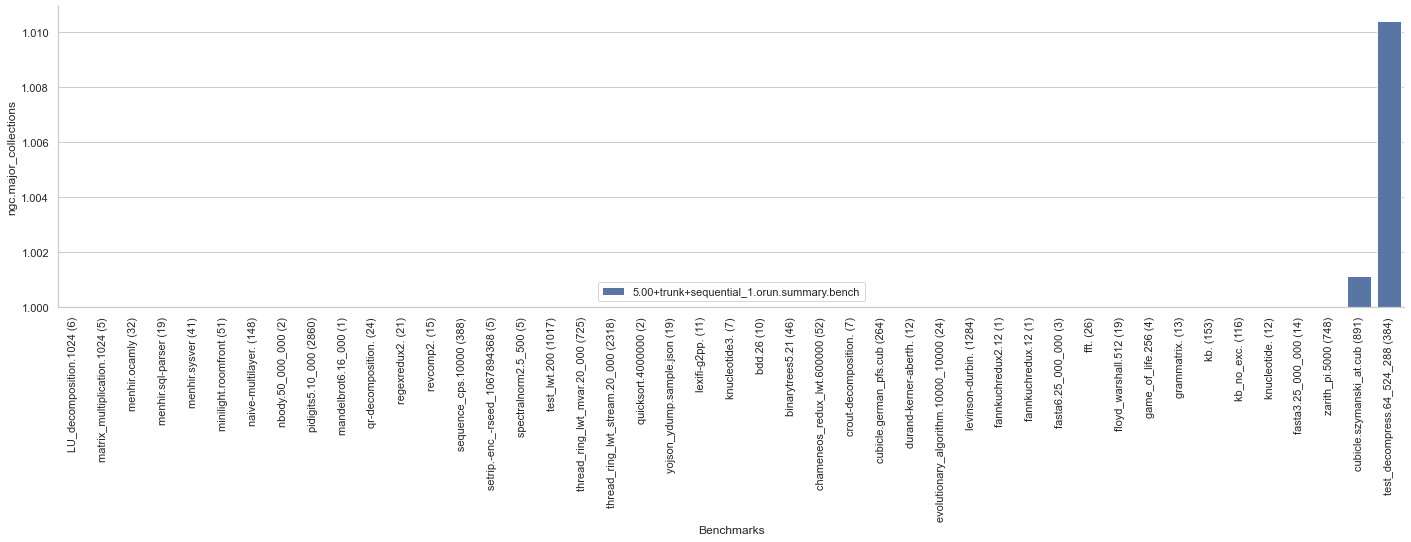

In [ ]:
ndf = normalise(df, selected_baseline,'gc.major_collections')
plot_normalised(ndf, selected_baseline,'ngc.major_collections')
ndf

## Major words

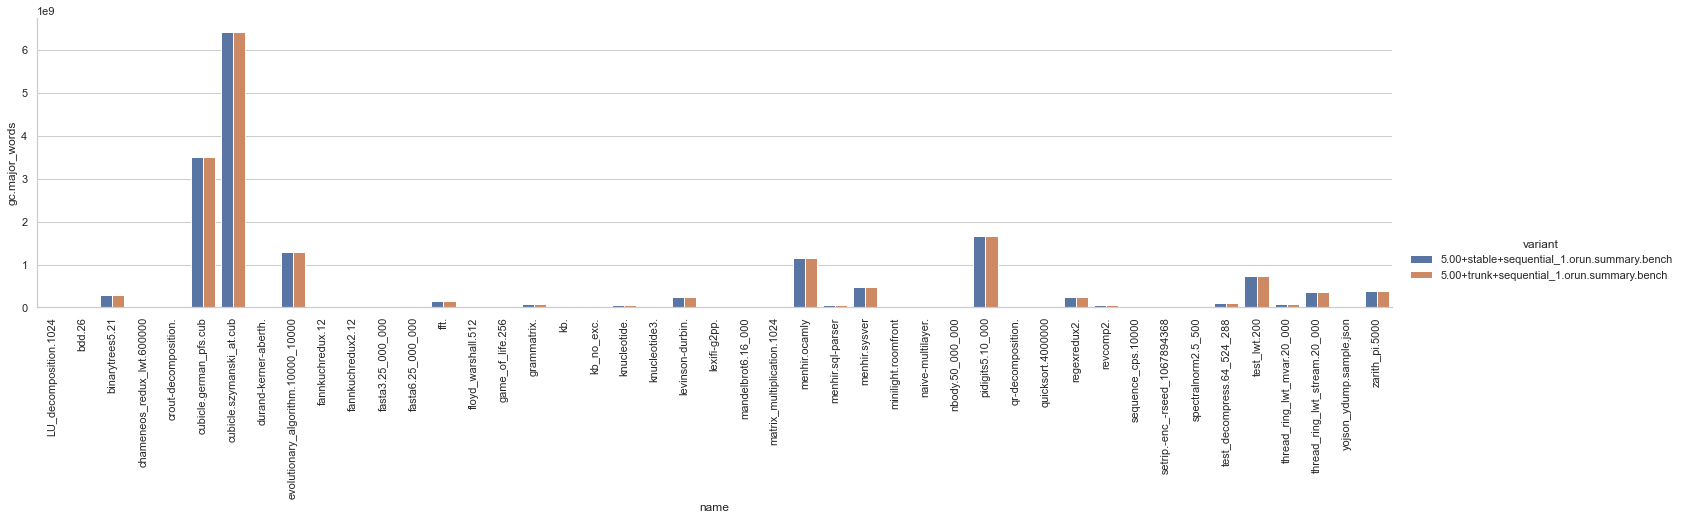

In [ ]:
g = sns.catplot (x='name', y='gc.major_words', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

/var/folders/kt/n9q5lcv93sg3lm2wsrn1kkrw0000gp/T/ipykernel_94763/2291190651.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["display_name"] = pd.Series(disp_name, index=df.index)


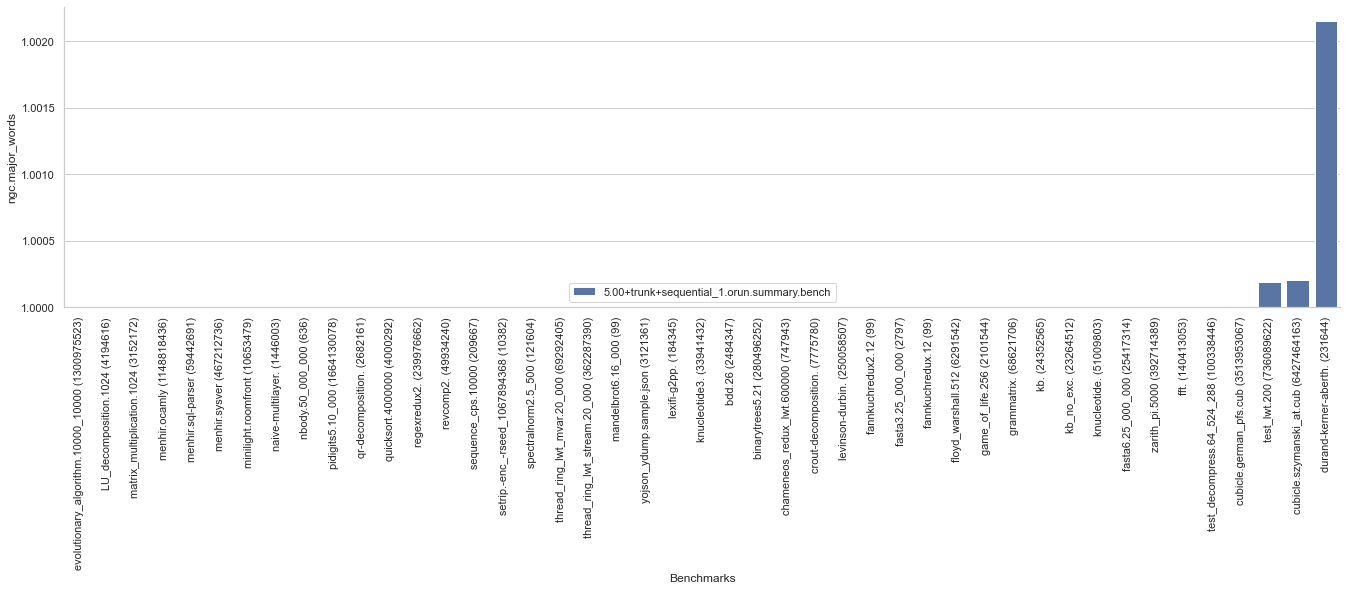

In [ ]:
ndf = normalise(df, selected_baseline,'gc.major_words')
plot_normalised(ndf, selected_baseline,'ngc.major_words')

## Minor Collections

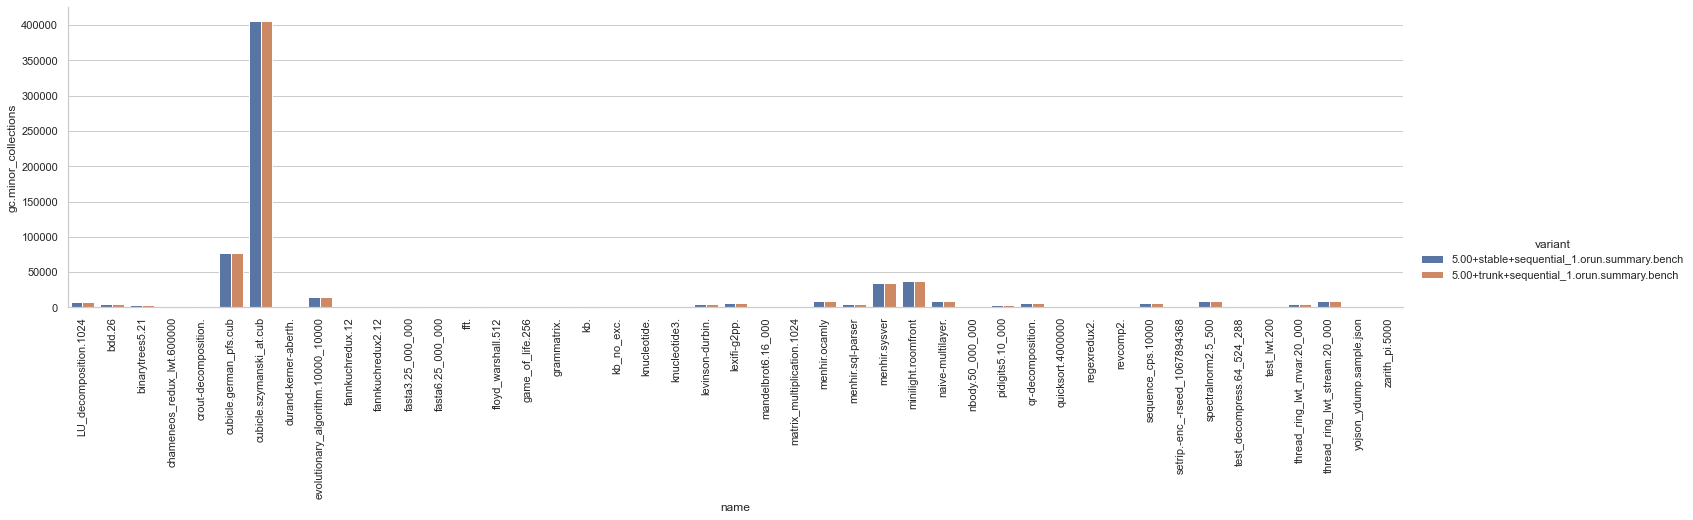

In [ ]:
g = sns.catplot (x='name', y='gc.minor_collections', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

/var/folders/kt/n9q5lcv93sg3lm2wsrn1kkrw0000gp/T/ipykernel_94763/2291190651.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["display_name"] = pd.Series(disp_name, index=df.index)


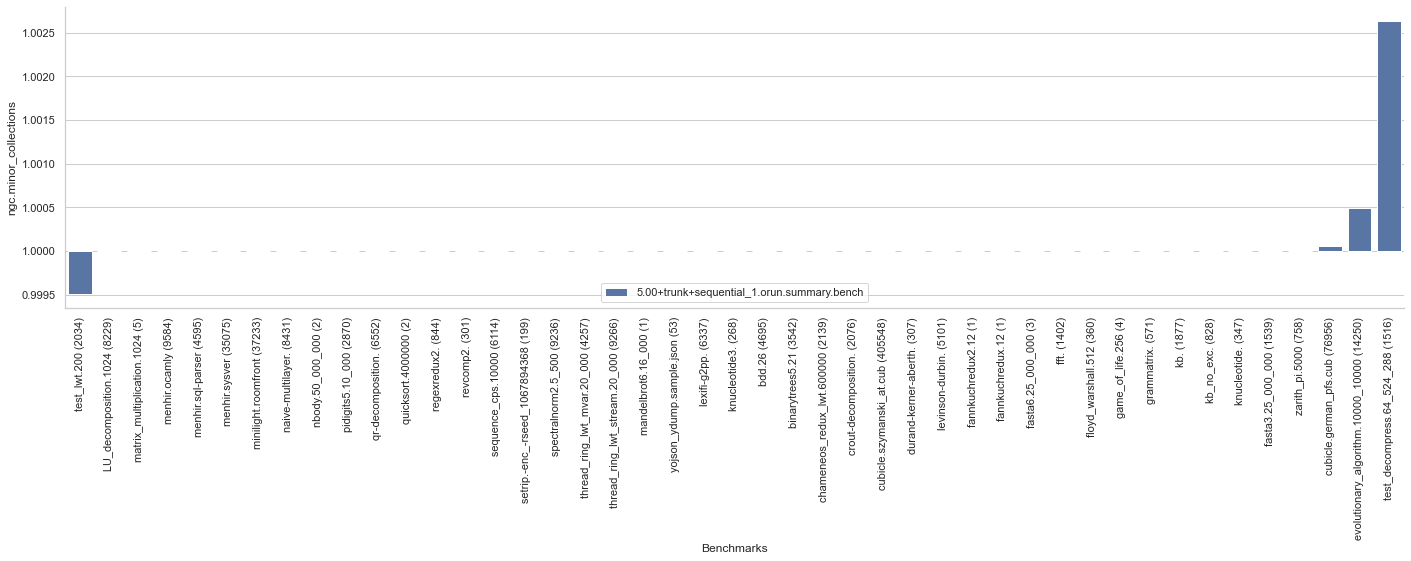

In [ ]:
ndf = normalise(df, selected_baseline, 'gc.minor_collections')
plot_normalised(ndf, selected_baseline, 'ngc.minor_collections')